# APS106 - Fundamentals of Computer Programming
## Week 12 | Lecture 1 (12.2) - More Pandas, Data Visualization

### This Week
| Lecture | Topics |
| --- | --- |
| 12.1 | Pandas |
| **12.2** | **More Pandas, Data Visualization** | 
| 12.3 | Design Problem: Stock Market, Part 1 |

### Lecture Structure
1. [Conditional Selection](#section1)
2. [Breakout Session 1](#section2)
3. [Adding, removing, and modifying columns](#section3)
4. [Utility Methods](#section4)
5. [String Methods](#section5)
6. [Concatentation](#section6)
7. [Breakout Session 2](#section7)
8. [Data Visualization](#section8)

<a id='section1'></a>
## 1. Conditional Selection
Let's create a `Node`.

In [6]:
import pandas as pd

<a id='section2'></a>
## 2. Breakout Session 1
Let's create a `Node`.

<a id='section3'></a>
## 3. Adding, removing, and modifying columns
Let's create a `Node`.

<a id='section4'></a>
## 4. Utility Methods
Let's create a `Node`.

<a id='section5'></a>
## 5. String Methods
Let's create a `Node`.

<a id='section6'></a>
## 6. Concatenation
In the lecture folder, there are six `.csv` files from **Uber** showing monthly ridership numbers from April 2014 to September 2014.

Given what we've learned aleady in Lectures 12.1, we know how to import these `.csv` files to **Pandas** `DataFrames`. Lets try that.

In [7]:
april_data = pd.read_csv('uber-raw-data-apr14.csv')
may_data = pd.read_csv('uber-raw-data-may14.csv')
june_data = pd.read_csv('uber-raw-data-jun14.csv')
july_data = pd.read_csv('uber-raw-data-jul14.csv')
aug_data = pd.read_csv('uber-raw-data-aug14.csv')
sept_data = pd.read_csv('uber-raw-data-sep14.csv')

Let's see what the April data looks like.

In [ ]:
april_data.head()

In this DataFrame, each row is an Uber trip

Suppose we're asked to plot the number of trips per hour from April 2014 to September 2014. To tackle this problem, it would be much easier if all the data was in one DataFrame.

In the following section, you'll be introduces to two Pandas methods for combining DataFrames: `.concatenate()` and `.merge()`. The figure below is helpful for figuring out which method to use.

<br>
<img src="images/merging_dataframes.png" alt="drawing" width="750"/>
<br>

### Concatenate

We use the `.concat()` function to append either columns or rows from one DataFrame to another. This happens to be the functionality we need to handle the Uber data we import above.

[`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) has many features, which you're encouraged to explore, but the basic function is demonstrated below.

If we look at the flow diagram above, if we want to stack multiple DataFrames side-by-side, then we set `axis=1`.

In [8]:
# Stack the DataFrames on top of each other
uber_data = pd.concat([april_data, 
                       may_data, 
                       june_data, 
                       july_data, 
                       aug_data, 
                       sept_data], axis=1)

# View combined DataFrame
uber_data.head()

,Date/Time,Lat,Lon,Base,Date/Time,Lat,Lon,Base,Date/Time,Lat,...,Lon,Base,Date/Time,Lat,Lon,Base,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,5/1/2014 0:02:00,40.7521,-73.9914,B02512,6/1/2014 0:00:00,40.7293,...,-73.9706,B02512,8/1/2014 0:03:00,40.7366,-73.9906,B02512,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,5/1/2014 0:06:00,40.6965,-73.9715,B02512,6/1/2014 0:01:00,40.7131,...,-73.9994,B02512,8/1/2014 0:09:00,40.7260,-73.9918,B02512,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,5/1/2014 0:15:00,40.7464,-73.9838,B02512,6/1/2014 0:04:00,40.3461,...,-73.9999,B02512,8/1/2014 0:12:00,40.7209,-74.0507,B02512,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,5/1/2014 0:17:00,40.7463,-74.0011,B02512,6/1/2014 0:04:00,40.7555,...,-73.9793,B02512,8/1/2014 0:12:00,40.7387,-73.9856,B02512,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,5/1/2014 0:17:00,40.7594,-73.9734,B02512,6/1/2014 0:07:00,40.6880,...,-74.0047,B02512,8/1/2014 0:12:00,40.7323,-74.0077,B02512,9/1/2014 0:11:00,40.8145,-73.9444,B02512


However, this is not what we want to do with the Uber data. We'd like to stack the data from each month, one on top of each other from April to September. To accomplish this, we need to set `axis=0`. Note that the order of the months in the DataFrame (top to bottom) follows the order of months in the `.concat()` method, left to right.

In [9]:
# Stack the DataFrames on top of each other
uber_data = pd.concat([april_data, 
                       may_data, 
                       june_data, 
                       july_data, 
                       aug_data, 
                       sept_data], axis=0)

# View combined DataFrame
uber_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


We can see April data dat the top of the DataFrame

In [10]:
uber_data.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


and September data at the bottom.

Next, let's plot the index of our new DataFrame `uber_data` and inspect.

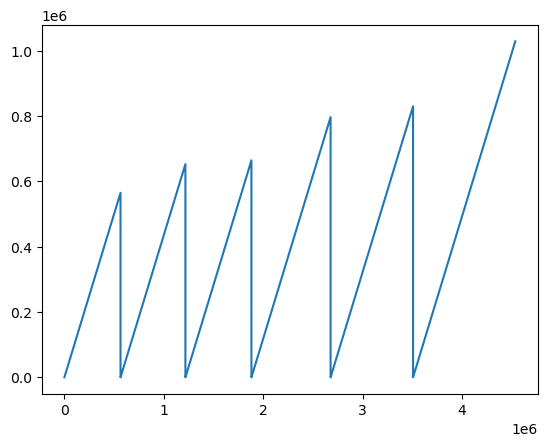

In [13]:
import matplotlib.pylab as plt
plt.plot(uber_data.index)
plt.show()

We can clearly see from the plot that when concatenating the DataFrames, the original indexes have been preserved, meaning that we have duplicates, which will be an issue moving forward. 

To adjust the row index automatically, we have to set the argument `ignore_index` as `True` while calling the `.concat()` function.

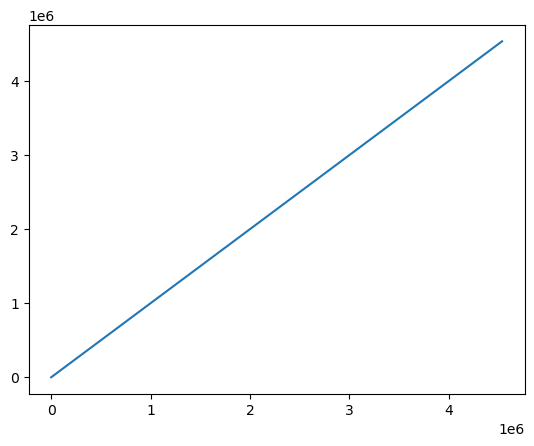

In [14]:
uber_data = pd.concat([april_data, 
                       may_data, 
                       june_data, 
                       july_data, 
                       aug_data, 
                       sept_data], 
                      axis=0,
                      ignore_index=True)

plt.plot(uber_data.index)
plt.show()

Now each row has a unique index!

The `.concat()` function has many more features that you should definitely [check out](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [18]:
uber_data = pd.read_csv('uber-raw-data-jun14.csv')
uber_data = uber_data.set_index('Date/Time')
uber_data.index = pd.DatetimeIndex(uber_data.index)
counts = uber_data.index.value_counts().resample('H').sum()

<a id='section7'></a>
## 7. Breakout Session 2
Let's create a `Node`.

<a id='section8'></a>
## 8. Data Visualization
Let's create a `Node`.